In [9]:
# Zero-shot DINO pairwise eval
import sys
sys.path.append('../scripts')

from data_generation import LineGenerator, DatasetGenerator
from dino_zeroshot_eval import evaluate_zeroshot, build_pairs

lg = LineGenerator()
dg = DatasetGenerator(lg)
dataset = dg.generate_mixed_dataset(samples_per_type=10, rotation_step=10)
len(dataset)


1800

In [11]:
results = evaluate_zeroshot(dataset, model_name='vit_small_patch16_224.dino', num_pairs=1000)
results


{'accuracy': 0.745,
 'num_pairs': 1000,
 'details': [{'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'gt': 1, 'correct_after_rotation': None},
  {'

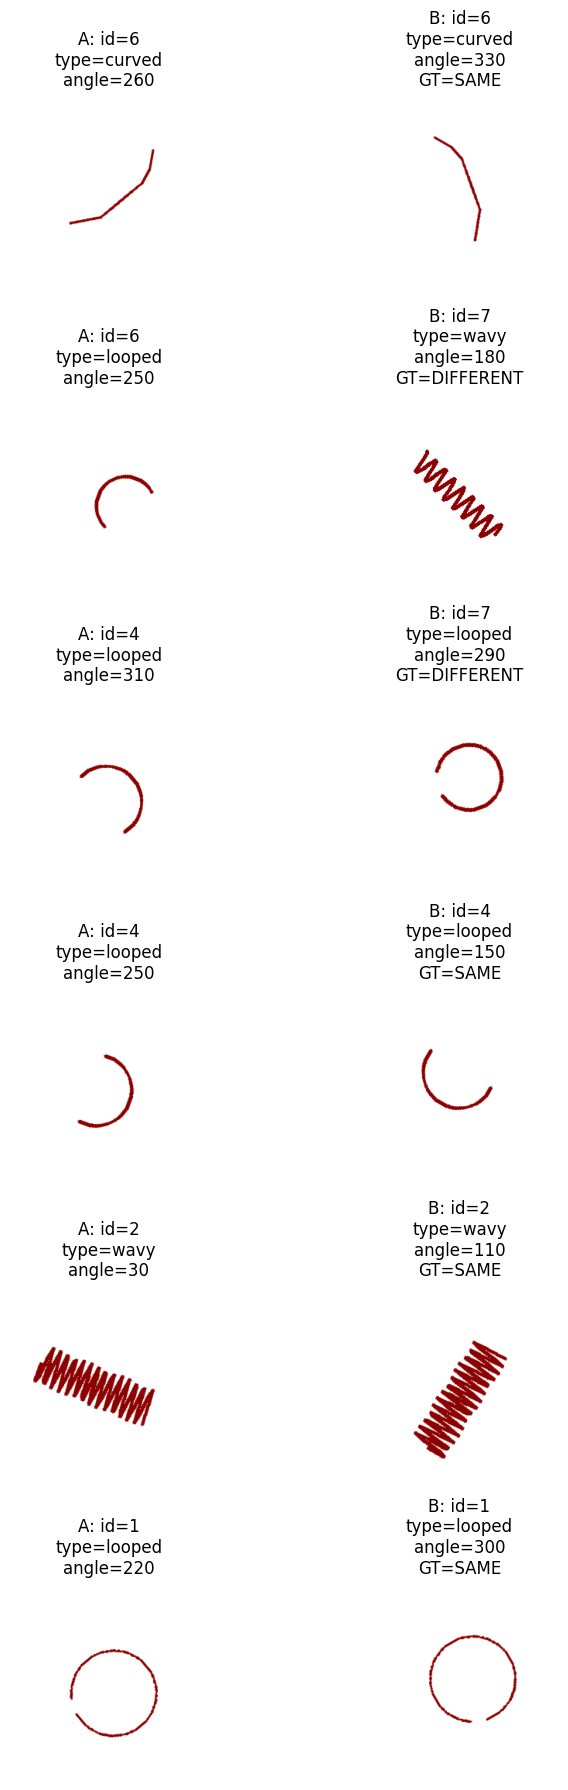

In [10]:
import matplotlib.pyplot as plt
import random
import cv2

def show_evaluation_pairs(pairs, n=6):
    """Display some of the image pairs the model was evaluated on."""
    samples = random.sample(pairs, min(n, len(pairs)))
    plt.figure(figsize=(8, 3 * len(samples)))
    
    for i, (a, b, gt) in enumerate(samples):
        img_a = cv2.cvtColor(a['image'], cv2.COLOR_BGR2RGB)
        img_b = cv2.cvtColor(b['image'], cv2.COLOR_BGR2RGB)
        
        plt.subplot(len(samples), 2, 2*i + 1)
        plt.imshow(img_a)
        plt.axis('off')
        plt.title(f"A: id={a['sample_id']}\n"
                  f"type={a['line_type']}\nangle={a['angle']}")
        
        plt.subplot(len(samples), 2, 2*i + 2)
        plt.imshow(img_b)
        plt.axis('off')
        label = "SAME" if gt == 1 else "DIFFERENT"
        plt.title(f"B: id={b['sample_id']}\n"
                  f"type={b['line_type']}\nangle={b['angle']}\nGT={label}")
    
    plt.tight_layout()
    plt.show()

data = dg.generate_mixed_dataset(samples_per_type=10, rotation_step=10)
pairs = build_pairs(data, num_pairs=10)

show_evaluation_pairs(pairs, n=6)
